In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = "./data/labeled_data.csv"
df = pd.read_csv(file_path)
df

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.59,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,5fa112bb9c0189cc66dac22a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,21.000000,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [4]:
file_path = "./data/labeled_data.csv"
df2 = pd.read_csv(file_path)
df2
data2 = df2.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD", "PART_NAME",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [5]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import font_manager, rc

import platform

### 한글 font 설정
plt.rc("font", family = "Malgun Gothic")

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

In [6]:
data["PassOrFail"] = data["PassOrFail"].replace(to_replace="Y",value=1).replace(to_replace="N",value=0)
data2["PassOrFail"] = data2["PassOrFail"].replace(to_replace="Y",value=1).replace(to_replace="N",value=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9740\2576803400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["PassOrFail"] = data["PassOrFail"].replace(to_replace="Y",value=1).replace(to_replace="N",value=0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9740\2576803400.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2["PassOrFail"] = data2["PassOrFail"].replace(to_replace="Y",value=1).replace(to_replace="N",value=0)


In [7]:
corr_matrix = data2.corr()
corr_matrix

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
PassOrFail,1.000000,0.063649,0.044973,0.075506,-0.104913,0.054563,-0.003685,0.072868,0.074580,-0.068364,...,-0.078888,-0.047229,-0.068892,-0.072859,-0.060507,-0.077185,-0.068947,0.035679,-0.033387,-0.047858
Injection_Time,0.063649,1.000000,0.992421,0.979066,-0.889491,0.799305,-0.069663,0.986463,0.978168,-0.997183,...,-0.207082,-0.635898,-0.909398,-0.913682,-0.710381,-0.960215,-0.927499,0.115500,-0.169291,-0.105360
Filling_Time,0.044973,0.992421,1.000000,0.965679,-0.925011,0.857519,-0.018450,0.995382,0.989764,-0.996776,...,-0.108727,-0.565517,-0.866977,-0.872455,-0.650441,-0.936969,-0.924492,0.197833,-0.145072,-0.090566
Plasticizing_Time,0.075506,0.979066,0.965679,1.000000,-0.848314,0.752778,0.031029,0.959985,0.938886,-0.972952,...,-0.304399,-0.595643,-0.942251,-0.946473,-0.780439,-0.982690,-0.961320,0.109432,-0.104725,-0.047636
Cycle_Time,-0.104913,-0.889491,-0.925011,-0.848314,1.000000,-0.970058,-0.093847,-0.947870,-0.957864,0.914705,...,-0.171431,0.327240,0.657388,0.665827,0.395065,0.782725,0.821383,-0.477294,0.054577,0.048259
Clamp_Close_Time,0.054563,0.799305,0.857519,0.752778,-0.970058,1.000000,0.190911,0.883653,0.897918,-0.834524,...,0.363253,-0.159589,-0.518814,-0.528939,-0.243115,-0.670682,-0.745290,0.610122,0.006161,-0.011501
Cushion_Position,-0.003685,-0.069663,-0.018450,0.031029,-0.093847,0.190911,1.000000,-0.012054,-0.053134,0.055916,...,0.158102,0.732564,0.060155,0.048846,0.014724,-0.032321,-0.247350,0.394981,0.299942,0.276190
Plasticizing_Position,0.072868,0.986463,0.995382,0.959985,-0.947870,0.883653,-0.012054,1.000000,0.996785,-0.994733,...,-0.069374,-0.542330,-0.844521,-0.850399,-0.617440,-0.923267,-0.915894,0.248493,-0.117523,-0.070800
Clamp_Open_Position,0.074580,0.978168,0.989764,0.938886,-0.957864,0.897918,-0.053134,0.996785,1.000000,-0.988777,...,-0.017518,-0.545135,-0.811824,-0.817688,-0.570726,-0.895954,-0.885009,0.274208,-0.136603,-0.097375
Max_Injection_Speed,-0.068364,-0.997183,-0.996776,-0.972952,0.914705,-0.834524,0.055916,-0.994733,-0.988777,1.000000,...,0.151740,0.607301,0.887441,0.892288,0.676514,0.948570,0.924511,-0.159953,0.161823,0.102912


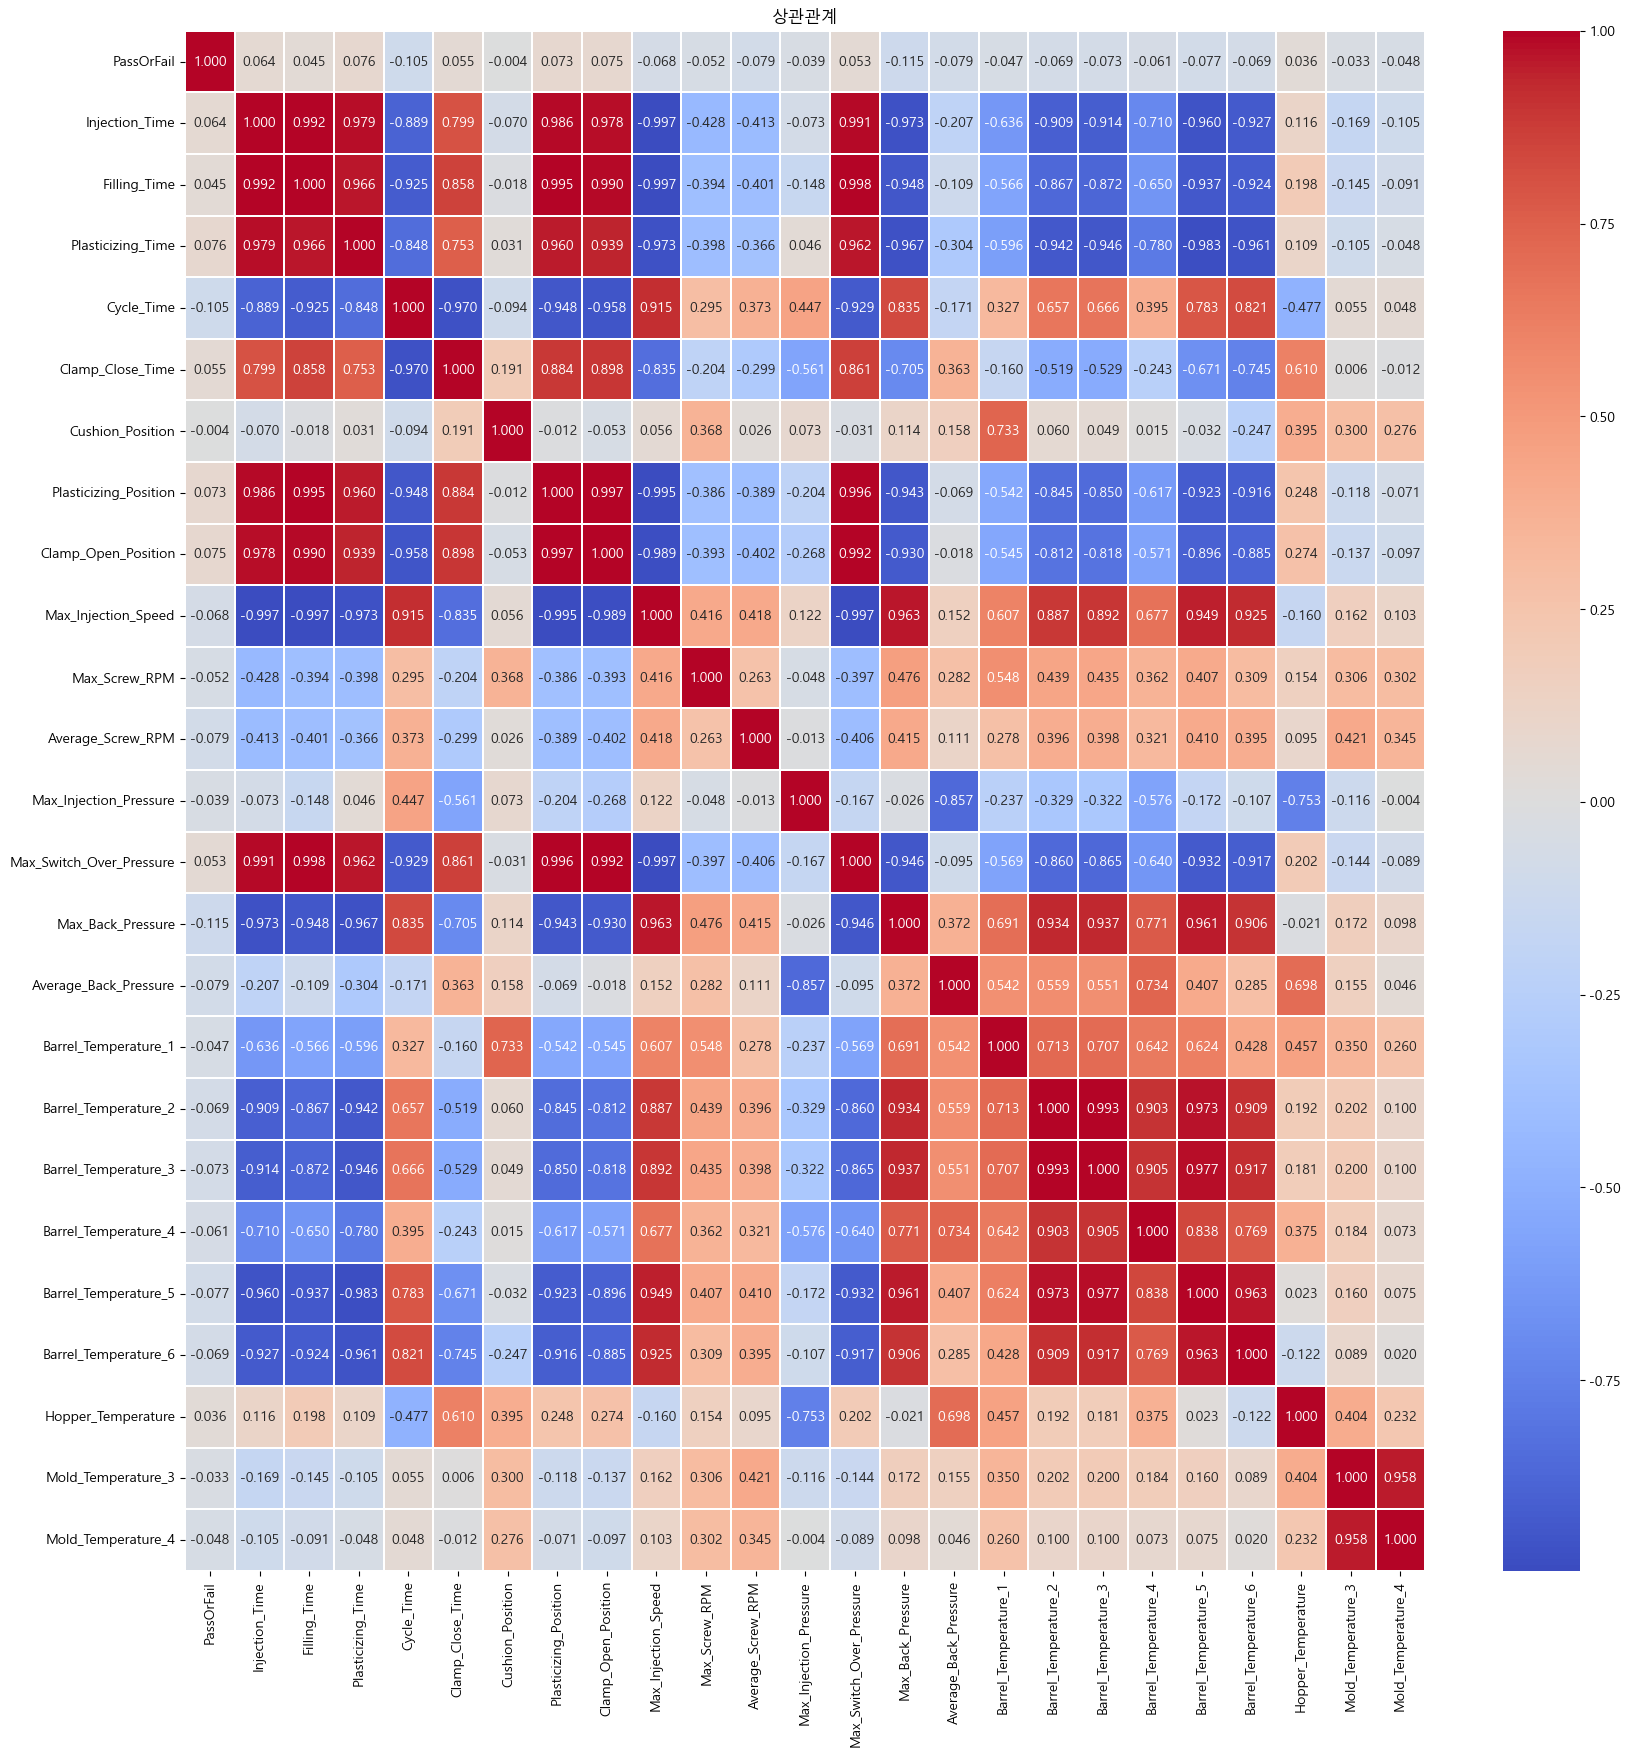

In [8]:
plt.figure(figsize=(20,20))
# 제목
plt.title("상관관계")
### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.3)
# 그리기
plt.show()

In [9]:
data = data.drop(columns=["Filling_Time","Plasticizing_Time","Cycle_Time","Plasticizing_Position", "Clamp_Open_Position", "Max_Injection_Speed",
                          "Max_Switch_Over_Pressure","Max_Back_Pressure", "Barrel_Temperature_2", "Barrel_Temperature_3","Barrel_Temperature_5",
                          "Barrel_Temperature_6"])
data2 = data2.drop(columns=["Filling_Time","Plasticizing_Time","Cycle_Time","Plasticizing_Position", "Clamp_Open_Position", "Max_Injection_Speed",
                          "Max_Switch_Over_Pressure","Max_Back_Pressure", "Barrel_Temperature_2", "Barrel_Temperature_3","Barrel_Temperature_5",
                          "Barrel_Temperature_6"])

In [10]:
corr_matrix = data2.corr()
corr_matrix

,PassOrFail,Injection_Time,Clamp_Close_Time,Cushion_Position,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_4,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
PassOrFail,1.000000,0.063649,0.054563,-0.003685,-0.052421,-0.079129,-0.039465,-0.078888,-0.047229,-0.060507,0.035679,-0.033387,-0.047858
Injection_Time,0.063649,1.000000,0.799305,-0.069663,-0.427735,-0.413188,-0.073349,-0.207082,-0.635898,-0.710381,0.115500,-0.169291,-0.105360
Clamp_Close_Time,0.054563,0.799305,1.000000,0.190911,-0.204157,-0.299469,-0.560950,0.363253,-0.159589,-0.243115,0.610122,0.006161,-0.011501
Cushion_Position,-0.003685,-0.069663,0.190911,1.000000,0.367992,0.026384,0.073327,0.158102,0.732564,0.014724,0.394981,0.299942,0.276190
Max_Screw_RPM,-0.052421,-0.427735,-0.204157,0.367992,1.000000,0.263091,-0.048143,0.282025,0.548362,0.361909,0.153888,0.306001,0.302257
Average_Screw_RPM,-0.079129,-0.413188,-0.299469,0.026384,0.263091,1.000000,-0.013187,0.110926,0.278295,0.321274,0.094841,0.420506,0.345103
Max_Injection_Pressure,-0.039465,-0.073349,-0.560950,0.073327,-0.048143,-0.013187,1.000000,-0.857343,-0.237198,-0.575731,-0.752665,-0.116411,-0.003783
Average_Back_Pressure,-0.078888,-0.207082,0.363253,0.158102,0.282025,0.110926,-0.857343,1.000000,0.542168,0.734173,0.698188,0.155212,0.046104
Barrel_Temperature_1,-0.047229,-0.635898,-0.159589,0.732564,0.548362,0.278295,-0.237198,0.542168,1.000000,0.642263,0.456582,0.350026,0.259991
Barrel_Temperature_4,-0.060507,-0.710381,-0.243115,0.014724,0.361909,0.321274,-0.575731,0.734173,0.642263,1.000000,0.374915,0.184249,0.073097


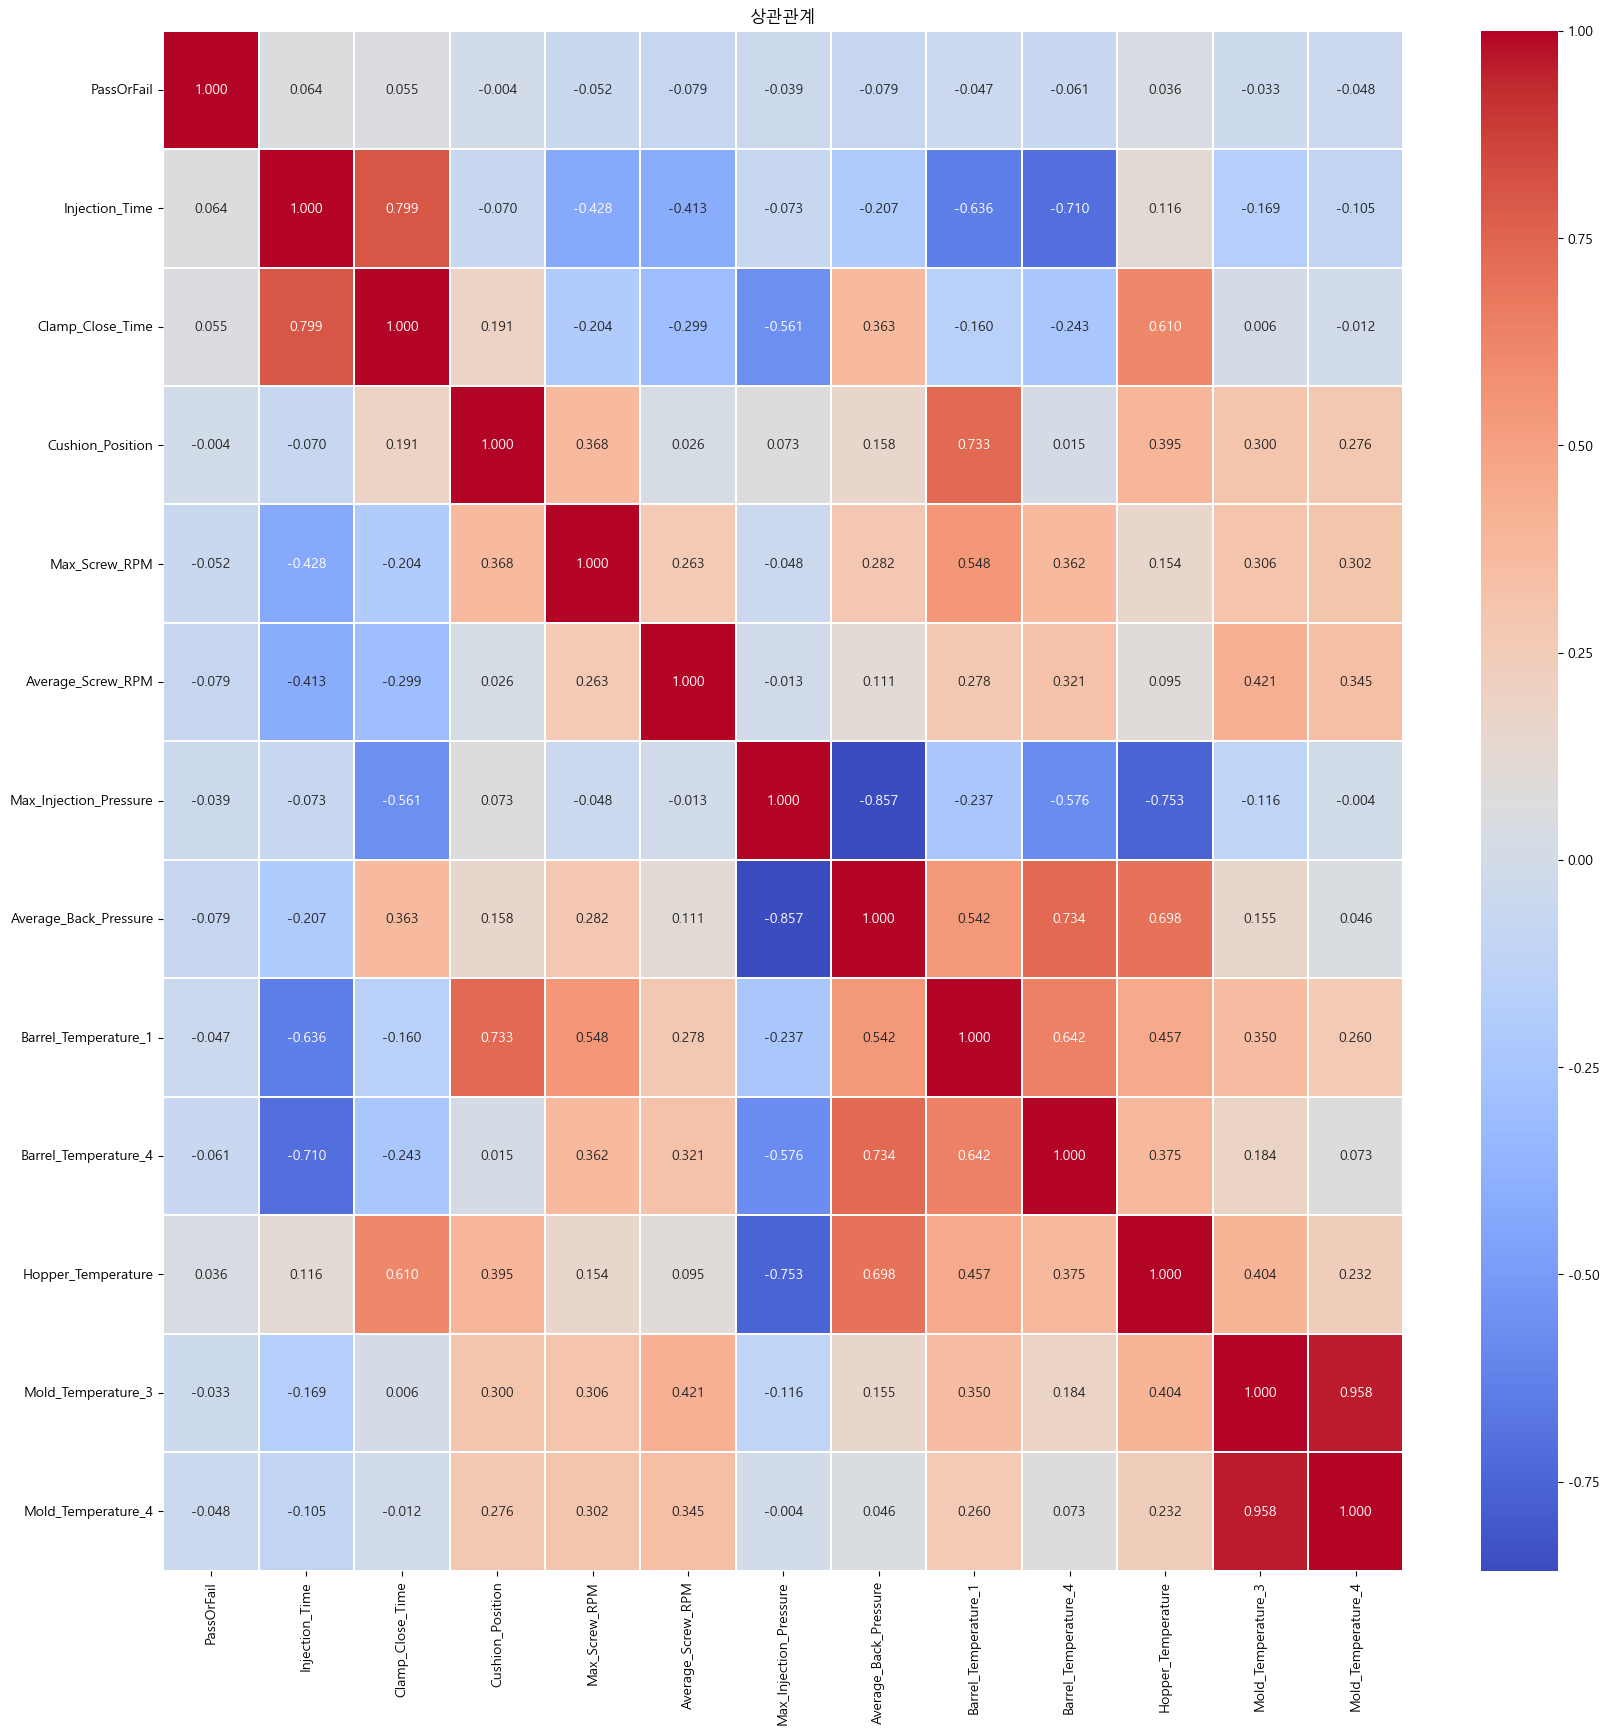

In [11]:
plt.figure(figsize=(20,20))
# 제목
plt.title("상관관계")
### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.3)
# 그리기
plt.show()

In [12]:
data = data.drop(columns=["Mold_Temperature_4"])
data2 = data2.drop(columns=["Mold_Temperature_4"])

In [13]:
corr_matrix = data2.corr()
corr_matrix

,PassOrFail,Injection_Time,Clamp_Close_Time,Cushion_Position,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_4,Hopper_Temperature,Mold_Temperature_3
PassOrFail,1.000000,0.063649,0.054563,-0.003685,-0.052421,-0.079129,-0.039465,-0.078888,-0.047229,-0.060507,0.035679,-0.033387
Injection_Time,0.063649,1.000000,0.799305,-0.069663,-0.427735,-0.413188,-0.073349,-0.207082,-0.635898,-0.710381,0.115500,-0.169291
Clamp_Close_Time,0.054563,0.799305,1.000000,0.190911,-0.204157,-0.299469,-0.560950,0.363253,-0.159589,-0.243115,0.610122,0.006161
Cushion_Position,-0.003685,-0.069663,0.190911,1.000000,0.367992,0.026384,0.073327,0.158102,0.732564,0.014724,0.394981,0.299942
Max_Screw_RPM,-0.052421,-0.427735,-0.204157,0.367992,1.000000,0.263091,-0.048143,0.282025,0.548362,0.361909,0.153888,0.306001
Average_Screw_RPM,-0.079129,-0.413188,-0.299469,0.026384,0.263091,1.000000,-0.013187,0.110926,0.278295,0.321274,0.094841,0.420506
Max_Injection_Pressure,-0.039465,-0.073349,-0.560950,0.073327,-0.048143,-0.013187,1.000000,-0.857343,-0.237198,-0.575731,-0.752665,-0.116411
Average_Back_Pressure,-0.078888,-0.207082,0.363253,0.158102,0.282025,0.110926,-0.857343,1.000000,0.542168,0.734173,0.698188,0.155212
Barrel_Temperature_1,-0.047229,-0.635898,-0.159589,0.732564,0.548362,0.278295,-0.237198,0.542168,1.000000,0.642263,0.456582,0.350026
Barrel_Temperature_4,-0.060507,-0.710381,-0.243115,0.014724,0.361909,0.321274,-0.575731,0.734173,0.642263,1.000000,0.374915,0.184249


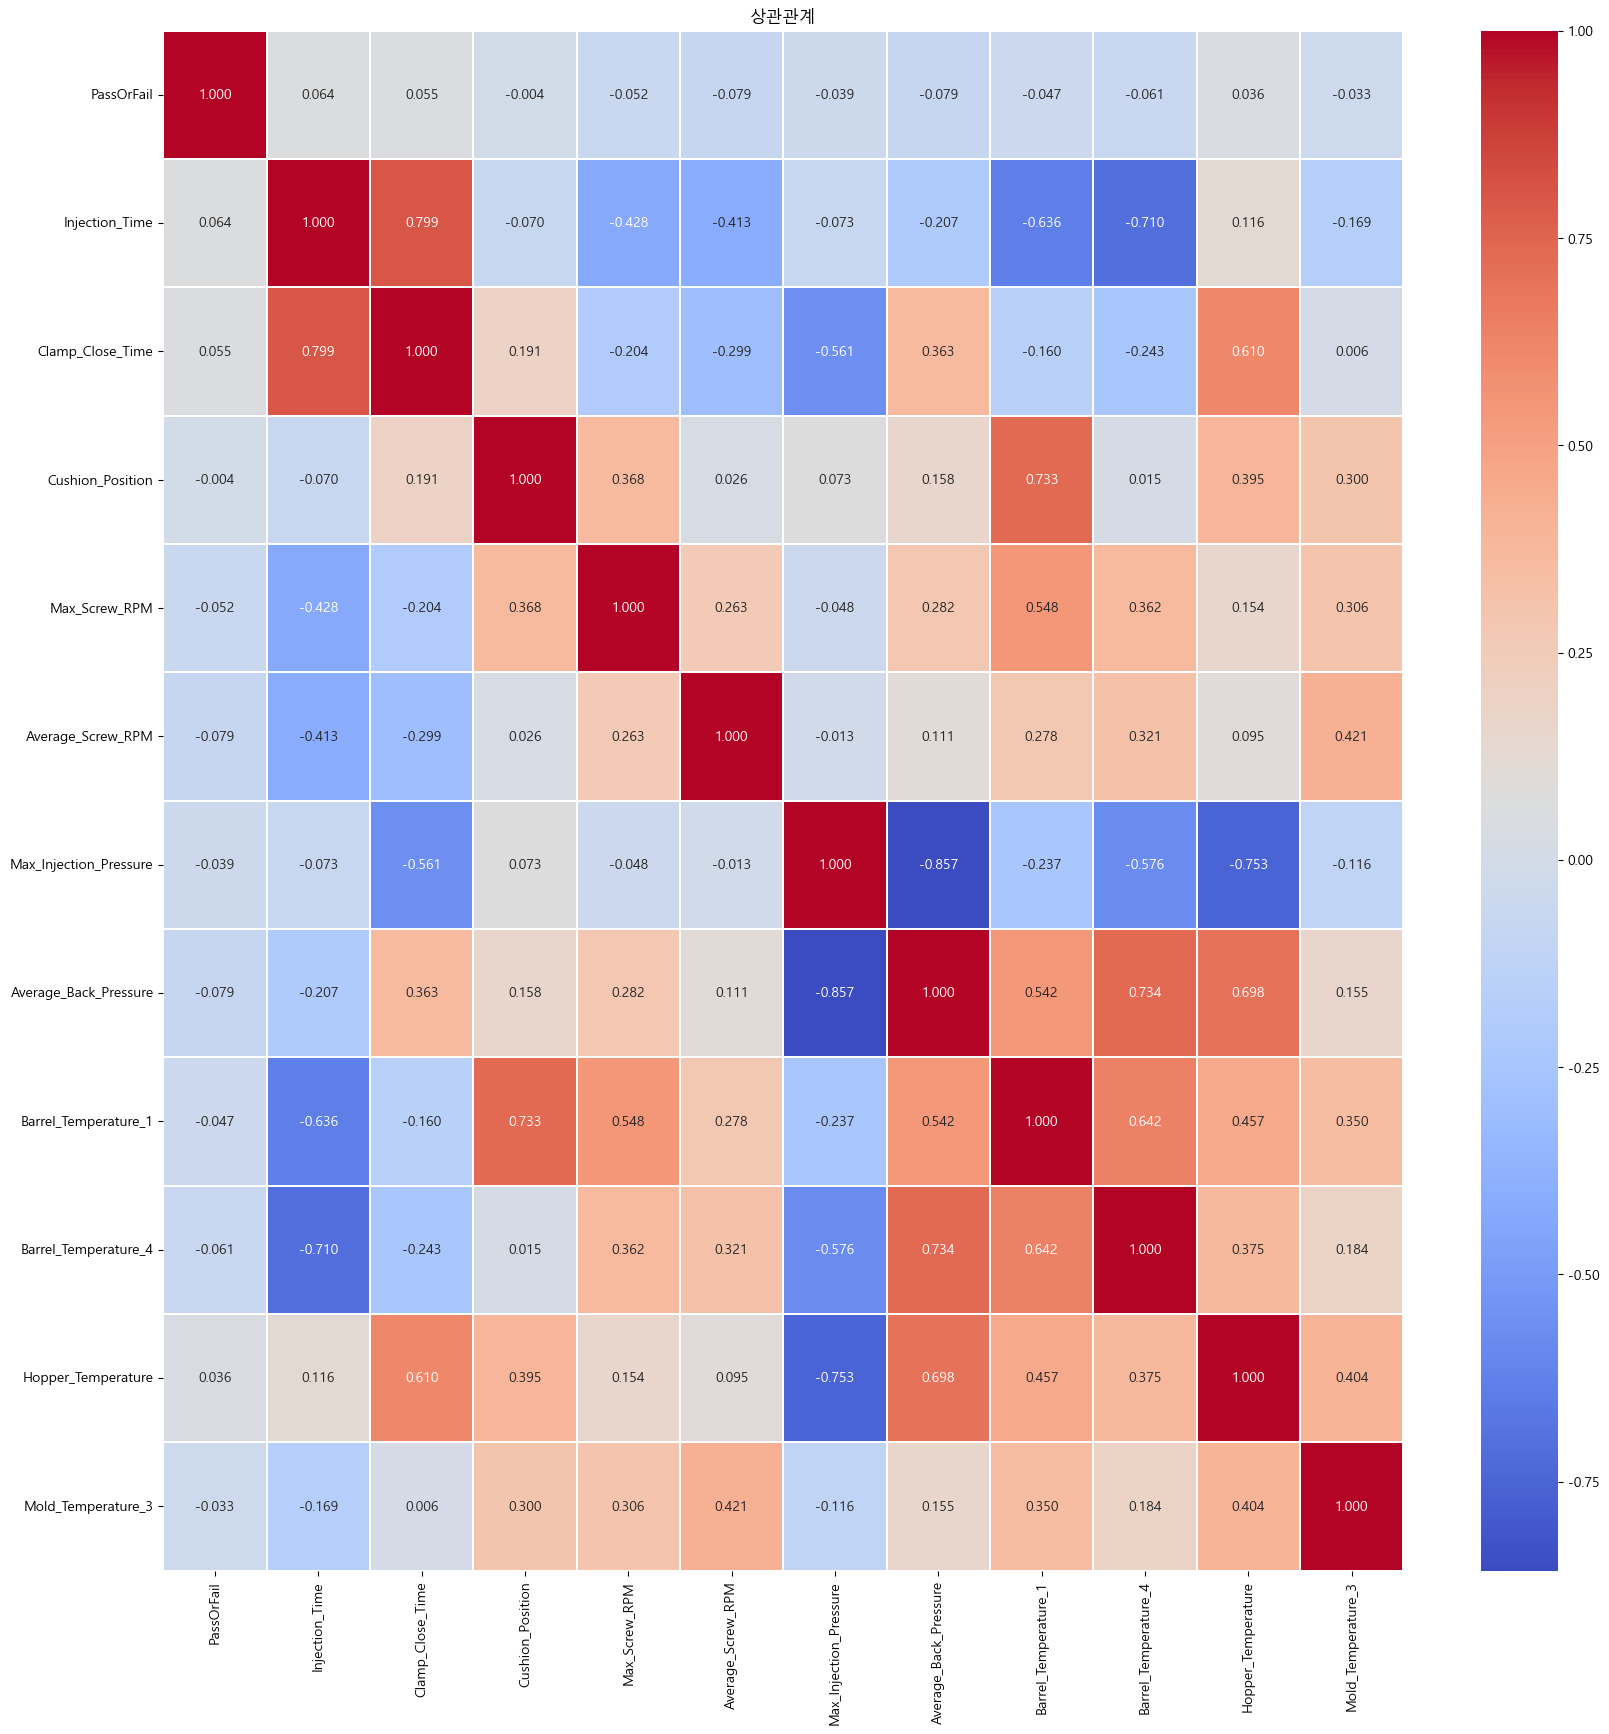

In [14]:
plt.figure(figsize=(20,20))
# 제목
plt.title("상관관계")
### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.3)
# 그리기
plt.show()

In [15]:
from scipy.stats import spearmanr, pearsonr

In [16]:
y = data2["PassOrFail"]
X =data2.drop(columns=["PassOrFail"])

In [17]:
x_columns_nm = X.columns
x_columns_nm

Index(['Injection_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_4',
       'Hopper_Temperature', 'Mold_Temperature_3'],
      dtype='object')

In [18]:
for i in x_columns_nm:
    print(i)
    print(spearmanr(X[i], y))
    print("==================================================================")

Injection_Time
SignificanceResult(statistic=0.01368938252231656, pvalue=0.2209614988144394)
Clamp_Close_Time
SignificanceResult(statistic=0.004808474059099401, pvalue=0.6672605847035351)
Cushion_Position
SignificanceResult(statistic=-0.01436463034348373, pvalue=0.19901749216659628)
Max_Screw_RPM
SignificanceResult(statistic=-0.0538877884206, pvalue=1.4254339969631123e-06)
Average_Screw_RPM
SignificanceResult(statistic=-0.05732040246724916, pvalue=2.9124427637176705e-07)
Max_Injection_Pressure
SignificanceResult(statistic=-0.07549241764798881, pvalue=1.3880374141721834e-11)
Average_Back_Pressure
SignificanceResult(statistic=-0.0688204688918087, pvalue=7.261044509940743e-10)
Barrel_Temperature_1
SignificanceResult(statistic=-0.041486374539516195, pvalue=0.00020665111373604732)
Barrel_Temperature_4
SignificanceResult(statistic=-0.06098442380668806, pvalue=4.829501341075019e-08)
Hopper_Temperature
SignificanceResult(statistic=0.07050716036173969, pvalue=2.760843099552138e-10)
Mold_Temperat

In [19]:
for i in x_columns_nm:
    print(i)
    print(pearsonr(X[i], y))
    print("===============================================")

Injection_Time
PearsonRResult(statistic=0.06364855402992861, pvalue=1.2239042850174177e-08)
Clamp_Close_Time
PearsonRResult(statistic=0.05456278706299739, pvalue=1.0506975862673404e-06)
Cushion_Position
PearsonRResult(statistic=-0.003685208961112715, pvalue=0.7417911736796229)
Max_Screw_RPM
PearsonRResult(statistic=-0.052420686592407936, pvalue=2.732475866897351e-06)
Average_Screw_RPM
PearsonRResult(statistic=-0.07912850872135915, pvalue=1.3833813152937529e-12)
Max_Injection_Pressure
PearsonRResult(statistic=-0.03946473571287692, pvalue=0.00041591478040938336)
Average_Back_Pressure
PearsonRResult(statistic=-0.07888813520350214, pvalue=1.6164519620722153e-12)
Barrel_Temperature_1
PearsonRResult(statistic=-0.04722928064956487, pvalue=2.3898702055807258e-05)
Barrel_Temperature_4
PearsonRResult(statistic=-0.0605072187123489, pvalue=6.139413994338457e-08)
Hopper_Temperature
PearsonRResult(statistic=0.035679180335968175, pvalue=0.0014179987194710621)
Mold_Temperature_3
PearsonRResult(statist

In [20]:
data = data.drop(columns=["Cushion_Position"])

In [21]:
data["PART_NAME"].unique()

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PART_NAME               7996 non-null   object 
 1   PassOrFail              7996 non-null   int64  
 2   Injection_Time          7996 non-null   float64
 3   Clamp_Close_Time        7996 non-null   float64
 4   Max_Screw_RPM           7996 non-null   float64
 5   Average_Screw_RPM       7996 non-null   float64
 6   Max_Injection_Pressure  7996 non-null   float64
 7   Average_Back_Pressure   7996 non-null   float64
 8   Barrel_Temperature_1    7996 non-null   float64
 9   Barrel_Temperature_4    7996 non-null   float64
 10  Hopper_Temperature      7996 non-null   float64
 11  Mold_Temperature_3      7996 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 749.8+ KB


In [23]:
cn7=data[(data["PART_NAME"]=="CN7 W/S SIDE MLD'G RH") | (data["PART_NAME"]=="CN7 W/S SIDE MLD'G LH")]
rg3=data[(data["PART_NAME"]=="RG3 MOLD'G W/SHLD, LH") | (data["PART_NAME"]=="RG3 MOLD'G W/SHLD, RH")]

In [24]:
cn7 = cn7.drop(columns=["PART_NAME"])
rg3 = rg3.drop(columns=["PART_NAME"])

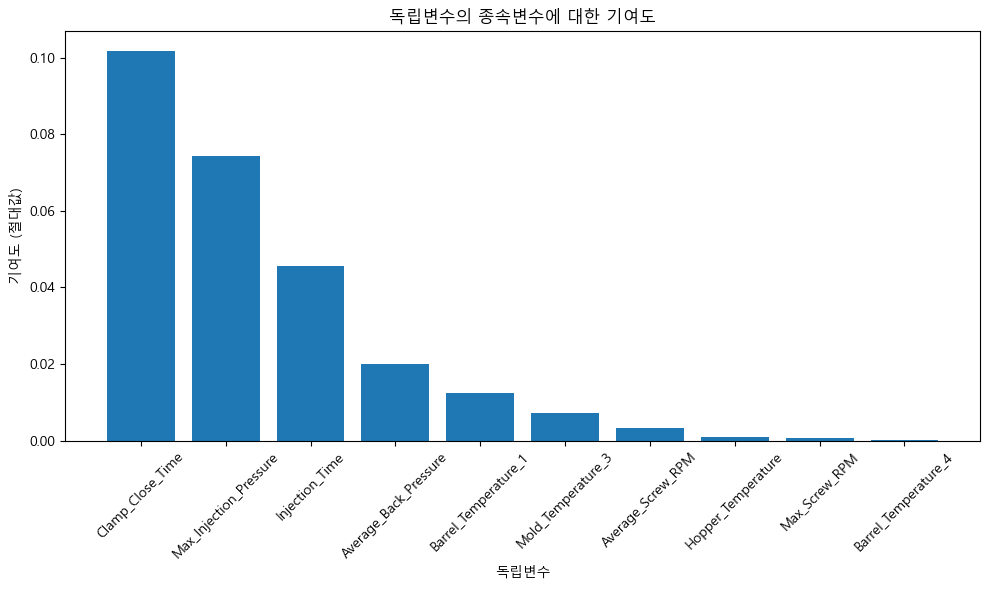

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 전처리
data = cn7
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 회귀 모델 학습
model = LinearRegression()
model.fit(X_scaled, y)

# 3. 독립변수 기여도 계산 (회귀 계수의 절대값 기준)
coefficients = model.coef_
feature_names = X.columns  # 컬럼명 가져오기

# 기여도 계산 및 정렬
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# 4. 기여도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), importance[sorted_idx], tick_label=np.array(feature_names)[sorted_idx])
plt.title('독립변수의 종속변수에 대한 기여도')
plt.xlabel('독립변수')
plt.ylabel('기여도 (절대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20)
model.fit(X_train_scaled, y_train)

val_pre = model.predict(X_val_scaled)
test_pre = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, val_pre)
# confusion_matrix(y_test, test_pre)

In [ ]:
acc = accuracy_score(y_test, test_pre)

pre = precision_score(y_test, test_pre)
rec = recall_score(y_test, test_pre)
f1 = f1_score(y_test, test_pre)

In [ ]:
acc, pre, rec, f1

In [ ]:
grid_df.to_csv("./data/simple_model.csv")